In [44]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import convolve2d
import cv2
from scipy import ndimage
image = np.array(Image.open('Chess-Board.jpg').convert("L"),dtype='uint8')

# Harris steps
1. Calculate image derivative respect to x & y axis
2. Gaussian smoothing of image derivatives
3. Harris measure computation
4. Thresholding
5. Non-max suppression


# Step 1: Calculate Image Derivative

In [45]:
def x_y_derivative(image):
    x_kernel = 1/8*np.array([[1,0,-1],
                        [2,0,-2],
                        [1,0,-1]])
    y_kernel = 1/8*np.array([[-1,-2,-1],
                        [0,0,0],
                        [1,2,1]])
    Ix = convolve2d(image,x_kernel,mode='same')
    
    Iy = convolve2d(image,y_kernel,mode='same')

    
    return Ix,Iy
Ix,Iy = x_y_derivative(image)

# Step 2: Smoothing derivatives

In [46]:
def smoothing_derivatives(Ix,Iy):
    guassian_filter = 1/16*np.array([[1,2,1],
                                     [2,4,2],
                                     [1,2,1]])
    Ix2 = convolve2d(Ix**2,guassian_filter,mode='same')
    Iy2 = convolve2d(Iy**2,guassian_filter,mode='same')
    Ixy = convolve2d(Ix*Iy,guassian_filter,mode='same')
    return Ix2, Iy2, Ixy
Ix2, Iy2, Ixy = smoothing_derivatives(Ix,Iy)

# Step 3: Harris measure
harris  = det(M) - trace(M)

In [162]:
lambd = 0.04
harris = (Ix2*Iy2-Ixy**2) - lambd*(Ix2+Iy2)

# Step 4: Thresholding

In [163]:
harris[harris<=0] = 0
harris=(harris - harris.min()) / (harris.max() - harris.min())*255


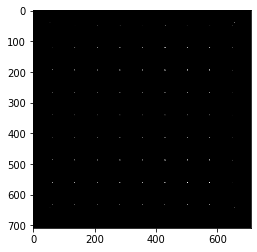

In [164]:
plt.imshow(harris,cmap='gray')

# Step 5: non-max supression